In [110]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [111]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [112]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

In [113]:
path = './data/'

df = pd.read_csv(path+'월별데이터 총병합.csv')

In [114]:
df

,Unnamed: 0,Year,Month,Region_Name,Region_Code,Building_Use,Sell_Price,Sell_BA,Sell_PPA,Sell_PPP,...,UR,LC_index,CA_index,TC_index,SDT_index,Crime_Rates,School_Counts,Subway_Counts,Univ_Counts,Park_Counts
0,0,2014,1,강남구,11680,단독다가구,231221.43,321.47,927.69,280.63,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
1,1,2014,1,강남구,11680,아파트,89505.48,86.55,1039.87,314.56,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
2,2,2014,1,강남구,11680,연립다세대,34570.70,60.10,617.49,186.79,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
3,3,2014,1,강남구,11680,오피스텔,25451.99,40.23,622.11,188.19,...,3.4,78.9,85.3,82.5,120.590868,1517.02,77,21,1,7
4,4,2014,2,강남구,11680,단독다가구,374166.85,452.19,1156.48,349.83,...,4.5,79.2,85.6,82.7,121.038496,1517.02,77,21,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,8051,2021,11,중랑구,11260,오피스텔,17302.79,29.17,597.86,180.85,...,2.6,107.1,105.3,105.7,100.134564,819.12,48,8,1,6
8052,8052,2021,12,중랑구,11260,단독다가구,97187.70,198.71,493.70,149.34,...,3.5,107.3,106.2,106.3,94.655902,819.12,48,8,1,6
8053,8053,2021,12,중랑구,11260,아파트,62155.66,66.94,949.29,287.16,...,3.5,107.3,106.2,106.3,94.655902,819.12,48,8,1,6
8054,8054,2021,12,중랑구,11260,연립다세대,31058.43,45.39,745.88,225.63,...,3.5,107.3,106.2,106.3,94.655902,819.12,48,8,1,6


In [115]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - Year : 년
    - Month : 월
    - Region_Code : 자치구 코드
    - JS_Count : 전세 거래량
   
- Continous
    - Sell : 매매
    - Sell_Price : 매매 가격
    - Sell_BA = Sell_building Area : 매매 건물 면적
    - Sell_PPA = Sell_Price Per Area : 면적 당 매매 가격
    - Sell_PPP = Sell_Price Per Pyeong : 평 당 매매 가격
    - Sell_Count : 매매 거래량
    - JS : 전세
    - JS_Price : 전세 가격
    - JS_BA = JS_Building Area : 임대 면적
    - JS_PPA = JS_Price Per Area : 임대 면적 당 전세 가격
    - JS_PPP = JS_Price Per Pyeong : 평 당 전세 가격
    - CR = Charter Rate : 전세가율
    - CR_PPA  = Charter_Rate_Price Per Area : 면적 당 전세가율
    - CR_PPP = Charter Rate_Price Per Pyeong : 평 당 전세가율
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8056 non-null   int64  
 1   Month          8056 non-null   int64  
 2   Region_Name    8056 non-null   object 
 3   Region_Code    8056 non-null   int64  
 4   Building_Use   8056 non-null   object 
 5   Sell_Price     8056 non-null   float64
 6   Sell_BA        8056 non-null   float64
 7   Sell_PPA       8056 non-null   float64
 8   Sell_PPP       8056 non-null   float64
 9   Sell_Count     8056 non-null   int64  
 10  JS_Price       8056 non-null   float64
 11  JS_BA          8056 non-null   float64
 12  JS_PPA         8056 non-null   float64
 13  JS_PPP         8056 non-null   float64
 14  JS_Count       8056 non-null   int64  
 15  CR             8056 non-null   float64
 16  CR_PPA         8056 non-null   float64
 17  CR_PPP         8056 non-null   float64
 18  IR      

In [117]:
df.columns

Index(['Year', 'Month', 'Region_Name', 'Region_Code', 'Building_Use',
       'Sell_Price', 'Sell_BA', 'Sell_PPA', 'Sell_PPP', 'Sell_Count',
       'JS_Price', 'JS_BA', 'JS_PPA', 'JS_PPP', 'JS_Count', 'CR', 'CR_PPA',
       'CR_PPP', 'IR', 'UR', 'LC_index', 'CA_index', 'TC_index', 'SDT_index',
       'Crime_Rates', 'School_Counts', 'Subway_Counts', 'Univ_Counts',
       'Park_Counts'],
      dtype='object')

## 정규성 가정 검토
- n>30이기 때문에 생략해도 되지만 실행해봄

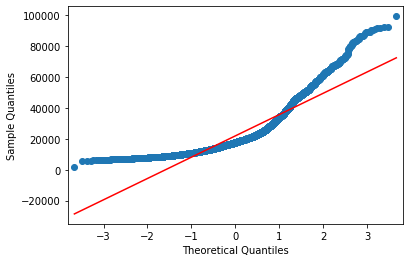

Shapiro-Wilk Test p-value: 0.0


C:\Users\spa84\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [118]:
# 종속 변수의 분포 확인 (Q-Q 플롯)
sm.qqplot(df['JS_Price'], line='s')
plt.show()

# 종속 변수의 정규성 검정 (Shapiro-Wilk 테스트)
shapiro_test = stats.shapiro(df['JS_Price'])
print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)

- 정규성 만족하지 않으므로 종속변수 로그변환

In [119]:
df['JS_Price'] = np.log(df['JS_Price'])

- 정규성 재확인 -> 만족

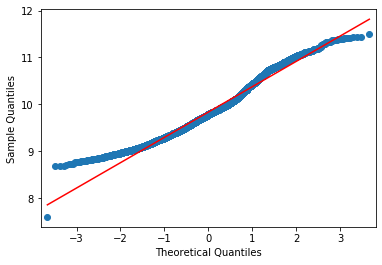

Shapiro-Wilk Test p-value: 1.706052262437707e-35


C:\Users\spa84\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [120]:
# 종속 변수의 분포 확인 (Q-Q 플롯)
sm.qqplot(df['JS_Price'], line='s')
plt.show()

# 종속 변수의 정규성 검정 (Shapiro-Wilk 테스트)
shapiro_test = stats.shapiro(df['JS_Price'])
print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)

## Feature_Scaling

In [121]:
# from sklearn.preprocessing import StandardScaler

# # 회귀분석에 사용할 변수들을 선택
# X = df[['Year', 'Month', 'Sell_Price', 'Sell_BA', 'Sell_PPA', 'Sell_PPP', 'Sell_Count',
#         'JS_BA', 'JS_PPA', 'JS_PPP', 'JS_Count', 'CR', 'BA_CR',
#        'PPA_CR', 'IR', 'UR', 'LC_index', 'CA_index', 'TC_index', 'SDT_index']]

# # 표준화를 위한 StandardScaler 객체 생성
# scaler = StandardScaler()

# # 데이터 표준화
# X_scaled = scaler.fit_transform(X)

In [122]:
def standardize(df):
    for column in df.columns:
        if df[column].dtype == float:
            df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])
    return df

In [123]:
df = standardize(df)

In [124]:
df

,Year,Month,Region_Name,Region_Code,Building_Use,Sell_Price,Sell_BA,Sell_PPA,Sell_PPP,Sell_Count,...,UR,LC_index,CA_index,TC_index,SDT_index,Crime_Rates,School_Counts,Subway_Counts,Univ_Counts,Park_Counts
0,2014,1,강남구,11680,단독다가구,2.846772,3.046072,0.755852,0.755892,14,...,-0.555136,-1.667846,-1.820048,-1.692746,0.878438,0.556864,77,21,1,7
1,2014,1,강남구,11680,아파트,0.515829,-0.062923,1.109071,1.109065,631,...,-0.555136,-1.667846,-1.820048,-1.692746,0.878438,0.556864,77,21,1,7
2,2014,1,강남구,11680,연립다세대,-0.387738,-0.412969,-0.220869,-0.220876,76,...,-0.555136,-1.667846,-1.820048,-1.692746,0.878438,0.556864,77,21,1,7
3,2014,1,강남구,11680,오피스텔,-0.537723,-0.675934,-0.206322,-0.206303,70,...,-0.555136,-1.667846,-1.820048,-1.692746,0.878438,0.556864,77,21,1,7
4,2014,2,강남구,11680,단독다가구,5.197937,4.776056,1.476239,1.476185,13,...,1.417989,-1.630798,-1.767373,-1.661944,0.910405,0.556864,77,21,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,2021,11,중랑구,11260,오피스텔,-0.671761,-0.822305,-0.282677,-0.282705,14,...,-1.990137,1.814697,1.691600,1.880288,-0.582421,-0.607471,48,8,1,6
8052,2021,12,중랑구,11260,단독다가구,0.642186,1.421433,-0.610644,-0.610688,30,...,-0.375761,1.839396,1.849624,1.972694,-0.973673,-0.607471,48,8,1,6
8053,2021,12,중랑구,11260,아파트,0.065979,-0.322447,0.823864,0.823862,53,...,-0.375761,1.839396,1.849624,1.972694,-0.973673,-0.607471,48,8,1,6
8054,2021,12,중랑구,11260,연립다세대,-0.445508,-0.607646,0.183391,0.183404,166,...,-0.375761,1.839396,1.849624,1.972694,-0.973673,-0.607471,48,8,1,6


In [125]:
# 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
def oh_encoding(df):
    # DataFrame의 복사본을 만듭니다.
    encoded_df = df.copy()
    for column in df.columns:
        if df[column].dtype == object:
            encoded_df = pd.get_dummies(encoded_df, columns=[column], prefix=column)
            print(column)
    return encoded_df

In [126]:
df_encoded = oh_encoding(df)

Region_Name
Building_Use


## 가정 검정에 필요한 모델 생성

In [127]:
# 특성 선택
selected_features = ['Subway_Counts', 'JS_BA', 'Sell_PPA', 'Sell_PPP', 'JS_PPA', 'JS_PPP', 'JS_Count', 'Sell_Count', 'LC_index', 'TC_index', 'Year',
                     'CA_index', 'Sell_Price', 'CR', 'Sell_BA', 'IR', 'Building_Use_아파트', 'Region_Name_강남구', 'Region_Name_서초구', 'Building_Use_단독다가구']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

## 등분산성 가정 검토

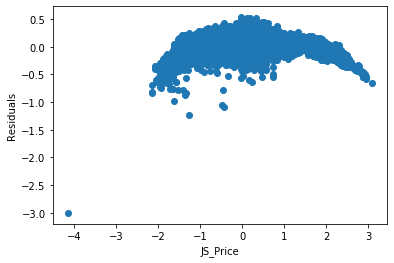

Bartlett Test p-value: 0.0
Levene Test p-value: 0.0


In [128]:
# 잔차 대 종속 변수 그래프
plt.scatter(df['JS_Price'], model.resid)
plt.xlabel('JS_Price')
plt.ylabel('Residuals')
plt.show()

# 등분산성 검정 (Bartlett 또는 Levene 테스트)
bartlett_test = stats.bartlett(df['JS_Price'], model.resid)
levene_test = stats.levene(df['JS_Price'], model.resid)
print('Bartlett Test p-value:', bartlett_test.pvalue)
print('Levene Test p-value:', levene_test.pvalue)

## 독립성 가정 검토

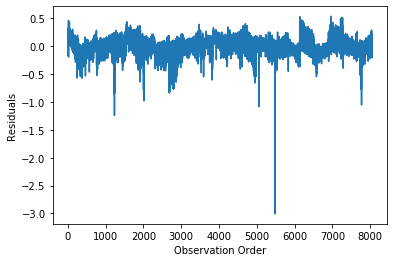

Durbin-Watson Statistic: 1.7747396400152835


In [129]:
# 잔차 대 샘플 순서 또는 시간 그래프
plt.plot(model.resid)
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()

# 독립성 검정 (Durbin-Watson 통계량)
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)
print('Durbin-Watson Statistic:', durbin_watson_statistic)

## Regression Analysis

In [130]:
# 특성 선택
selected_features = ['Subway_Counts', 'JS_BA', 'Sell_PPA', 'Sell_PPP', 'JS_PPA', 'JS_PPP', 'JS_Count', 'Sell_Count', 'LC_index', 'TC_index', 'Year',
                     'CA_index', 'Sell_Price', 'CR', 'Sell_BA', 'IR', 'Building_Use_아파트', 'Region_Name_강남구', 'Region_Name_서초구', 'Building_Use_단독다가구']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.586e+04
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:30:57   Log-Likelihood:                 3475.5
No. Observations:                8056   AIC:                            -6909.
Df Residuals:                    8035   BIC:                            -6762.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -44.9987     11